In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

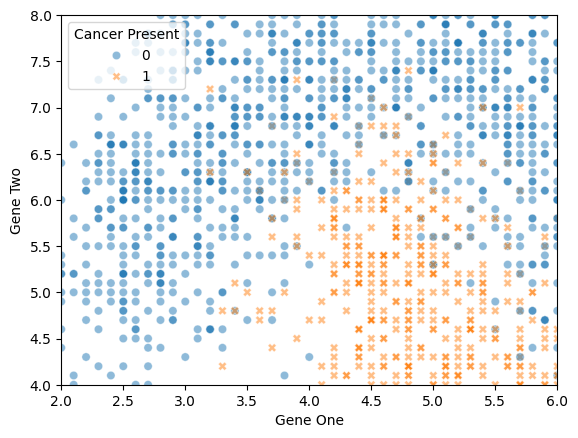

In [8]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

In [5]:
len(df)

3000

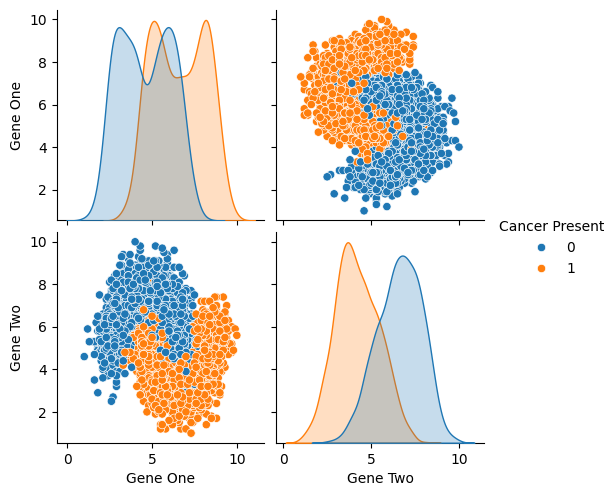

In [9]:
sns.pairplot(data=df,hue='Cancer Present')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop('Cancer Present',axis=1)

In [13]:
y = df['Cancer Present']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)

In [17]:
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn_model.predict(scaled_X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
confusion_matrix(y_test,y_pred)

array([[424,  46],
       [ 49, 381]])

In [24]:
len(y_test)

900

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [26]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [30]:
1 - accuracy_score(y_test,y_pred)

0.10555555555555551

In [31]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1-accuracy_score(y_test,y_pred_test)

    test_error_rates.append(test_error)

In [33]:
#test_error_rates

Text(0.5, 0, 'K Neighbors')

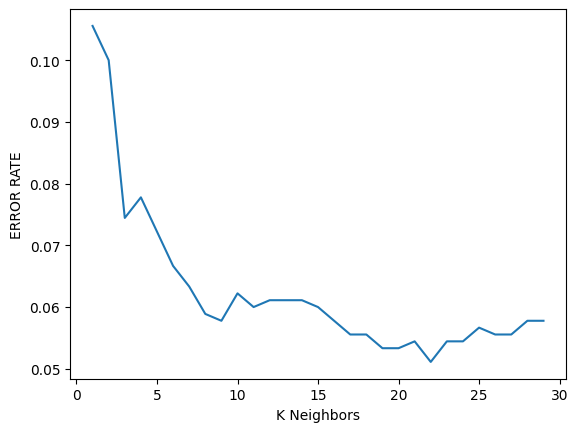

In [35]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [36]:
#PIPLINE ---> GRIDSEARCH CV

In [37]:
scaler = StandardScaler()

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [40]:
operations = [('scaler',scaler),('knn',knn)]

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
pipe = Pipeline(operations)

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
k_values = list(range(1,20))

In [46]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [52]:
param_grid = {'knn__n_neighbors':k_values}

In [53]:
#help(knn)

In [54]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,
                                 scoring='accuracy')

In [55]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [57]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [59]:
full_pred = full_cv_classifier.predict(X_test)

In [60]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [61]:
new_patient = [[3.8,6.4]]

In [62]:
full_cv_classifier.predict(new_patient)

/Users/selimagirel/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [63]:
full_cv_classifier.predict_proba(new_patient)

/Users/selimagirel/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])